In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv('./04cars-data.csv', header = 0)
data = df.iloc[:,-11:]
array = data.values
headers = list(df.columns.values[-11:])
cars =  df.iloc[:,0].values

In [39]:
from sklearn import preprocessing

array_scaled = preprocessing.scale(array)

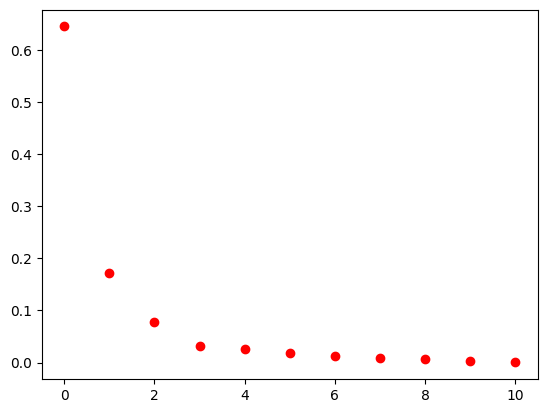

0.8171421089701894
0.8943901348942342


In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(array_scaled)

variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[:2]))
print(sum(variance_ratio[:3]))

Wariancja zostanie zachowana w 81,71% i 89,43% przy redukcji wymiarów do odpowiednio 2 i 3.

In [41]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(headers[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.2637504434440343:0.4685086975025389
Dealer Cost:-0.2623186387530953:0.4701465851382262
Engine Size (l):-0.3470804920252009:-0.015347186463713339
Cyl:-0.33418875762863726:0.07803201087501871
HP:-0.31860225848402934:0.29221347613918214
City MPG:0.3104817267323129:-0.0033659357616591698
Hwy MPG:0.3065886385804444:-0.010964460145348503
Weight:-0.3363293669404881:-0.16746357154787028
Wheel Base:-0.26621003357105444:-0.4181771069592039
Len:-0.25679018767068246:-0.40841138066875443
Width:-0.29605459141706125:-0.31289135016250724


Komponenty wiodące zawierają współżędne wektorów własnych, które to są wyznaczane na podstawie liniowej kombinacji wspólczynników cech wewnątrz danego komponentu wiodącego. Innymi słowy, im wyższa wartość bezwzględna dla współrzędnej danego wektora własnego komponentu wiodącego, tym dana cecha jest bardziej dystynktywna dla tego komponentu. Jeśli wspólrzędna wektora własnego jest bliska zeru, to wpływ danej cechy na ustyuowanie względem tego komponentu wiodącego jest mała.

In [90]:
features = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=True
)[:3]))

for i, featNo in enumerate(features[0]):
    print(i, featNo, headers[featNo], features[1][i])

0 5 City MPG 0.3104817267323129
1 6 Hwy MPG 0.3065886385804444
2 9 Len -0.25679018767068246


W tym przypadku powinniśmy się akurat skupić na pierwszych dwóch elementach, gdyż jak widzimy, trzeci z nich stoi do pierwszych dwóch w opozycji. Można zauważyć, że największe elementy pierwszego komponentu wiodącego odpowiadają oszczędności samochodu w konsumpcji paliwa. 

In [91]:
features = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=False
)[:3]))

for i, featNo in enumerate(features[0]):
    print(i, featNo, headers[featNo], features[1][i])

0 2 Engine Size (l) -0.3470804920252009
1 7 Weight -0.3363293669404881
2 3 Cyl -0.33418875762863726


Elementy najmniejsze z pierwszego komponentu wiodącego wskazują na cechy, które korelują z wyższym zużyciem paliwa, jak wielkość silnika, waga pojazdu czy ilość cylindrów.

In [93]:
features = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=True
)[:3]))

for i, featNo in enumerate(features[0]):
    print(i, featNo, headers[featNo], features[1][i])

0 1 Dealer Cost 0.4701465851382262
1 0 Retail Price 0.4685086975025389
2 4 HP 0.29221347613918214


Największe elementy drugiego komponentu wiodącego odpowiadają bezpośrednio cenie, oraz końom mechanicznym silnika, czyli parametrowi który w dużym stopniu składa się na cenę pojazdu.

In [92]:
features = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=False
)[:3]))

for i, featNo in enumerate(features[0]):
    print(i, featNo, headers[featNo], features[1][i])

0 8 Wheel Base -0.4181771069592039
1 9 Len -0.40841138066875443
2 10 Width -0.31289135016250724


Najmniejsze elementy drugiego komponentu wiodącego może i nie wskazują na elementy, które cenę pojazdu powinny zaniżać, ale jak możemy zauważyć na biplocie z tego sprawozdania, nie stoją one w kompletnej opozycji do największych elementów tego komponentu wiodącego. Można stwierdzić, że takie cechy jak: rozstaw kół, długość i szerokośc pojazdu korelują z wysoką ceną mniej, niż pozostałe uwzględnione cechy.

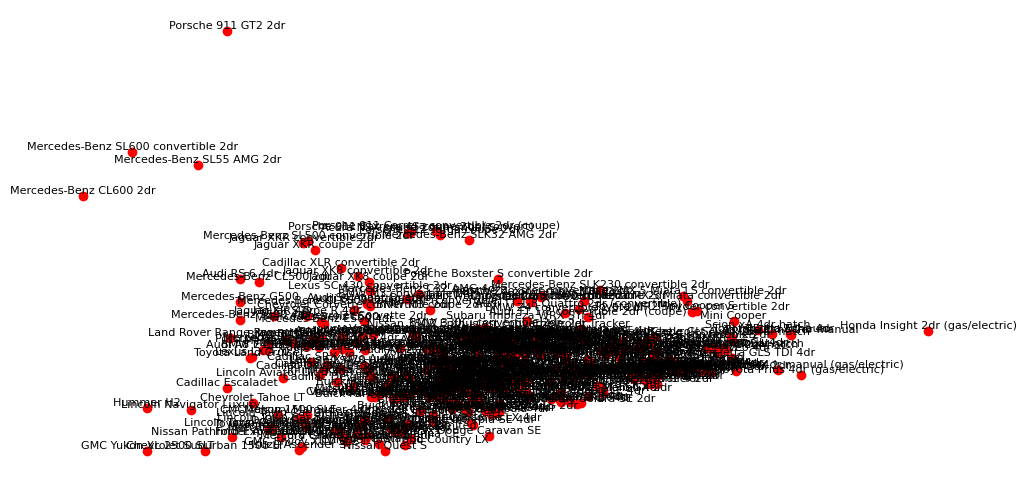

In [57]:
import matplotlib.pyplot as plt

x = X_pca[np.arange(0,len(array_scaled)), 0]
y = X_pca[np.arange(0,len(array_scaled)), 1]

plt.figure(figsize=(12, 6))
plt.scatter(x, y, c="red")
plt.axis('off')

for i, car in enumerate(cars):
    plt.text(x[i], y[i], car, fontsize=8, ha='center', va='bottom')

plt.show()

Na podstawie tego diagramu, możemy zbudować kilka klastrów z samochodami, jak np auta oszczędne, sportowe, SUV-y, czy też przeciętne.
Świetnym uzupełnieniem tego wykresu, jest następujący po nim biplot, który pozwala w bezpośredni sposób skorelować model samochodu z cechami, które się mu przypisuje, np ilość koni mechanicznych, oszczędność, rozmiary lub cenę.
Aby umiejscowić poszczególne klasy samochodów na wykresie skorzystam z następnego wykresu.

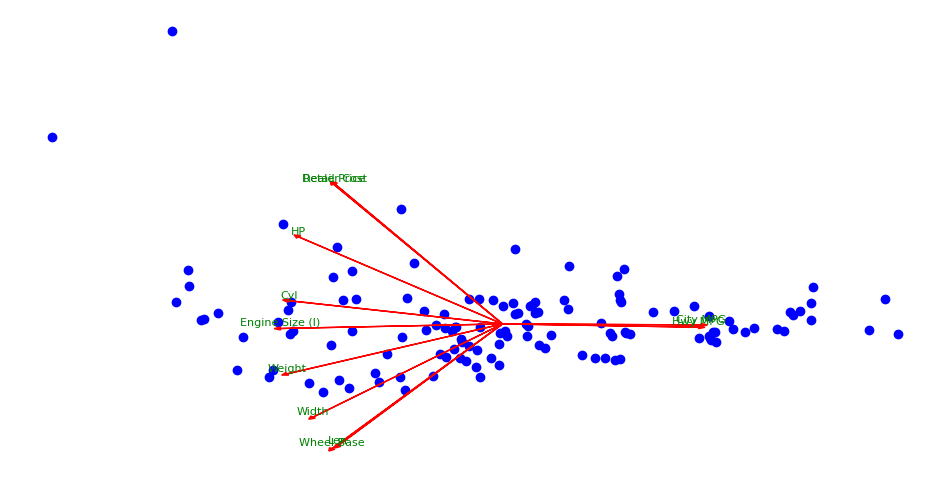

In [85]:
import matplotlib.pyplot as plt

step = 3
x = X_pca[np.arange(0,len(array_scaled), step), 0]
y = X_pca[np.arange(0,len(array_scaled), step), 1]
cars_with_label = cars[np.arange(0,len(array_scaled), step)]

plt.figure(figsize=(12, 6))
plt.scatter(x, y, c="blue")
plt.axis('off')

#for i in range(len(x)):
#   plt.text(x[i], y[i], cars_with_label[i], fontsize=8, ha='center', va='bottom')

for i, comps in enumerate(list(zip(10*pca.components_[0], 10*pca.components_[1]))):
    plt.arrow(0, 0, comps[0], comps[1], head_width=0.1, head_length=0.1, color='red')
    plt.text(comps[0], comps[1], headers[i], fontsize=8, ha='center', va='bottom', color='green')


plt.show()

Wykres ten świetnie uzupełnia rozkład pojazdów z poprzedniego wykresu. Możemy się trochę posiłkować nazwami modeli samochodów z poprzedniego diagramu, jednak dla czytelności usunąłem je z tego wykresu.
- Samochody małe i elektryczne to najczęsciej samochody oszczędne, dlatego też znajdują się po prawej stronie wykresu, gdzie takie parametry jak MPG w mieście i na autostradzie są największe.
- Samochody eksluzywne, np. sportowe znajdują się w lewej górnej ćwiartce wykresu. Usytuowanie w tym miejscu odpowiada wysokiej cenie i dużej liczbie koni mechanicznych, ale też nieskiej oszczędności samochodu = niskie MPG.
- Samochody użytkowe typu Pick-up czy SUV zajmują lewą dolną ćwiartkę. Ich usytuowanie tam odpowiada ich dużym rozmiarom i wadze, kiepskiej oszczędności paliwa ale i umiarkowanie niskiej cenie zakupu.
- Samochody przeciętne, takie których jest na ulicach najwięcej znajdują się w centrum wykresu, tym samym potwierdzona została ich przeciętność. W żadnym z parametrów nie odstają jakoś bardzo, czy to na plus, czy to na minus.